In [13]:
import torch

from hyper_kvasir.dataset import HyperKvasirDataModule
import torchvision.transforms as T

# inii the dataset and the dataloader
dm = HyperKvasirDataModule(
    # provide dataset config
    img_size=128,
    batch_size=32,
    transform=[
        T.RandomRotation(45),
    ],
    mixed_aug_with_target=[
        "backend_central_dev.data_processing.mix.CutMixUp",
        dict(
            prob=1.0,
            use_mixup=False,
        )
    ]
)

Applied transform for training: 
Compose(
      Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
      RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
      Lambda()
)
Applied mixed_aug_with_target for training: 
CutMixUp(num_classes=20, config={'prob': 1.0, 'use_mixup': False, 'use_cutmix': True, 'alpha': 1.0}, saliency_model=None)
Applied transform for validating: 
Compose(
      Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
      Lambda()
)


In [18]:
from effnetv2s.model import model_init_func, model_fine_tune_func
from backend_central_dev.model_training.lightning_model import FineTunableModel, MlxOps_LightningModel

ftm = FineTunableModel(
    model_init_func=model_init_func,
    model_fine_tune_func=model_fine_tune_func,
)

model = MlxOps_LightningModel(
    ftm, dm.num_classes,
    debug=True
)

In [20]:
import lightning as L

trainer = L.Trainer(
    precision='16-mixed',
    max_epochs=1,
    fast_dev_run=True,
)

Using 16bit Automatic Mixed Precision (AMP)
/Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/torch/cuda/amp/grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.


Dataset exist:  /Users/yinnnyou/autodl-tmp/ml_data/hyper_kvasir/labeled-images
Saliency Dataset exist:  None



  | Name    | Type             | Params
---------------------------------------------
0 | model   | EfficientNet     | 20.2 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.812    Total estimated model params size (MB)
/Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

/Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


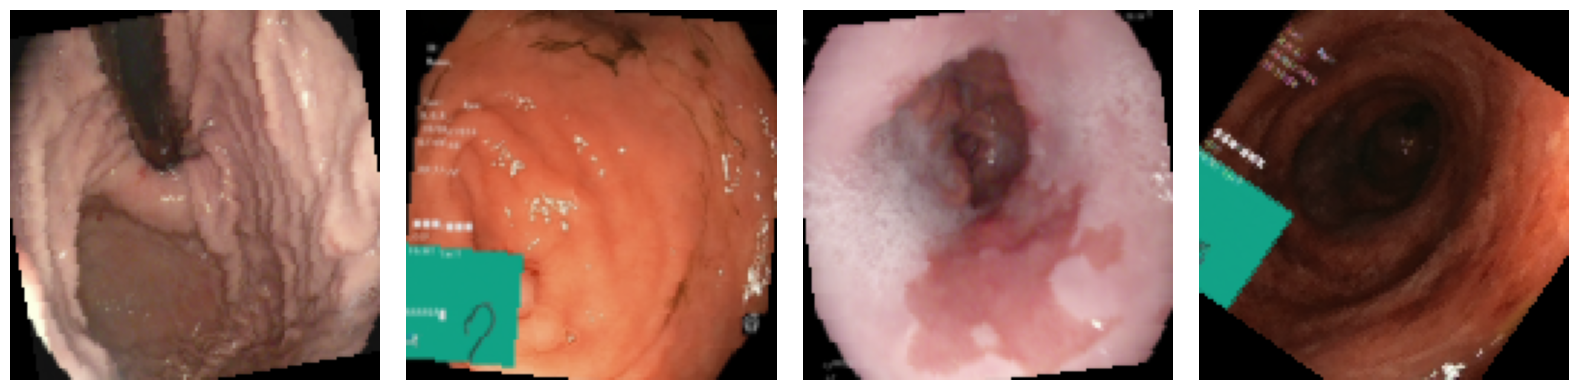

tensor([13,  4,  0, 16], device='mps:0')


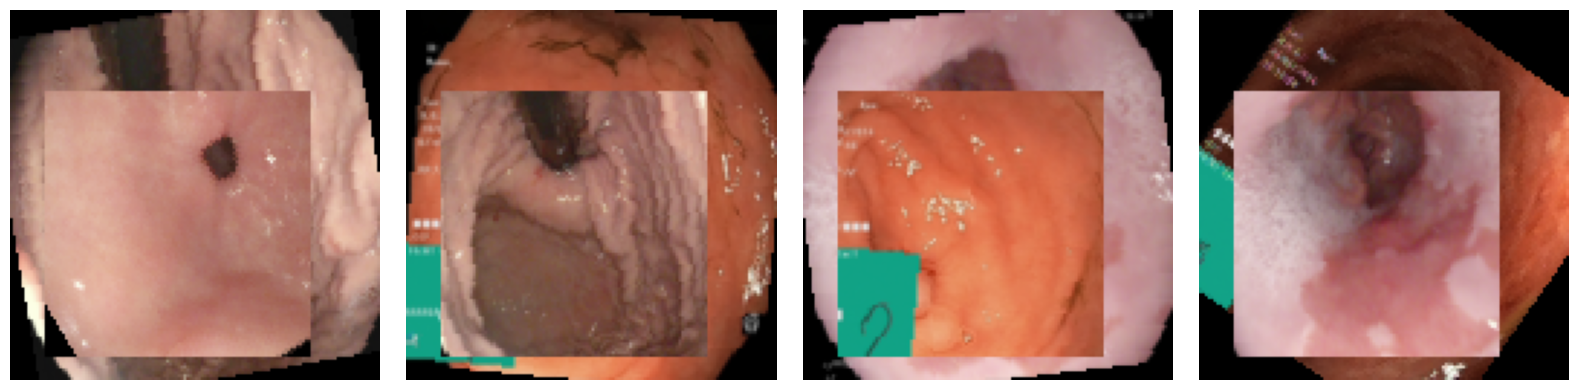

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.5166, 0.0000, 0.4834, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.4834, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.5166, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.4834, 0.0000, 0.0000, 0.0000, 0.5166, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.5166, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4834, 0.0000,
         0.0000, 0.0000]], device='mps:0')


/Users/yinnnyou/anaconda3/envs/mlflow/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1` reached.


In [21]:
trainer.fit(model, dm)